In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.patches import Patch
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# ENEM 2022


In [ ]:
# Carregar o dataset
caminho_do_arquivo = '/content/drive/MyDrive/MICRODADOS_ENEM_2022.csv'
dataframe = pd.read_csv(caminho_do_arquivo, encoding='ISO-8859-1', sep=';')

In [ ]:
# Labels das colunas a serem removidas
labels_para_remover = ['Q003', 'Q004', 'Q005', 'Q007', 'Q008', 'Q009', 'Q010',
                       'Q011', 'Q012', 'Q013', 'Q014', 'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020',
                       'Q021', 'Q022', 'Q023', 'Q024', 'Q025','NU_INSCRICAO','IN_TREINEIRO','TX_GABARITO_CN', 'TX_GABARITO_CH',
                       'TX_GABARITO_LC', 'TX_GABARITO_MT','TP_ENSINO', 'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH',
                       'TX_RESPOSTAS_LC', 'TX_RESPOSTAS_MT', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2','TP_FAIXA_ETARIA',
                       'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5','TP_ESTADO_CIVIL','TP_NACIONALIDADE',
                       'TP_ST_CONCLUSAO','CO_PROVA_CN','CO_PROVA_CH','CO_PROVA_LC','CO_PROVA_MT','TP_ANO_CONCLUIU',
                       'CO_UF_ESC','NO_MUNICIPIO_ESC','TP_DEPENDENCIA_ADM_ESC',
                       'TP_LOCALIZACAO_ESC','CO_UF_PROVA','TP_STATUS_REDACAO','TP_LINGUA']

# Remover as colunas do DataFrame
dataframe = dataframe.drop(columns=labels_para_remover)

In [ ]:
# Mapeamento dos valores numéricos para as labels de TP_SIT_FUNC_ESC
sit_func_labels = {
    1: 'Em atividade',
    2: 'Paralisada',
    3: 'Extinta',
    4: 'Escola extinta em anos anteriores'
}

# Aplicar a substituição usando numpy.where
dataframe['TP_SIT_FUNC_ESC'] = np.where(dataframe['TP_SIT_FUNC_ESC'].isin(sit_func_labels.keys()),
                                        dataframe['TP_SIT_FUNC_ESC'].map(sit_func_labels),
                                        dataframe['TP_SIT_FUNC_ESC'])

In [ ]:
# Mapeamento dos valores numéricos para as labels de TP_COR_RACA
cor_raca_labels = {
    0: 'Não declarado',
    1: 'Branca',
    2: 'Preta',
    3: 'Parda',
    4: 'Amarela',
    5: 'Indígena',
    6: 'Não dispõe da informação'
}

# Aplicar a substituição usando numpy.where
dataframe['TP_COR_RACA'] = np.where(dataframe['TP_COR_RACA'].isin(cor_raca_labels.keys()),
                                    dataframe['TP_COR_RACA'].map(cor_raca_labels),
                                    dataframe['TP_COR_RACA'])

In [ ]:
# Mapeamento dos valores numéricos para as labels de TP_ESCOLA
escola_labels = {
    1: 'Não respondeu',
    2: 'Pública',
    3: 'Privada'
}

# Aplicar a substituição usando numpy.where
dataframe['TP_ESCOLA'] = np.where(dataframe['TP_ESCOLA'].isin(escola_labels.keys()),
                                  dataframe['TP_ESCOLA'].map(escola_labels),
                                  dataframe['TP_ESCOLA'])

In [ ]:
# Mapeamento dos valores numéricos para as labels de TP_PRESENCA_CN
presenca_cn_labels = {
    0: 'Faltou à prova',
    1: 'Presente na prova',
    2: 'Eliminado na prova'
}

# Aplicar a substituição usando numpy.where
dataframe['TP_PRESENCA_CN'] = np.where(dataframe['TP_PRESENCA_CN'].isin(presenca_cn_labels.keys()),
                                       dataframe['TP_PRESENCA_CN'].map(presenca_cn_labels),
                                       dataframe['TP_PRESENCA_CN'])

In [ ]:
# Mapeamento dos valores numéricos para as labels de TP_PRESENCA_CH
presenca_ch_labels = {
    0: 'Faltou à prova',
    1: 'Presente na prova',
    2: 'Eliminado na prova'
}

# Aplicar a substituição usando numpy.where
dataframe['TP_PRESENCA_CH'] = np.where(dataframe['TP_PRESENCA_CH'].isin(presenca_ch_labels.keys()),
                                       dataframe['TP_PRESENCA_CH'].map(presenca_ch_labels),
                                       dataframe['TP_PRESENCA_CH'])

In [ ]:
# Mapeamento dos valores numéricos para as labels de TP_PRESENCA_LC
presenca_lc_labels = {
    0: 'Faltou à prova',
    1: 'Presente na prova',
    2: 'Eliminado na prova'
}

# Aplicar a substituição usando numpy.where
dataframe['TP_PRESENCA_LC'] = np.where(dataframe['TP_PRESENCA_LC'].isin(presenca_lc_labels.keys()),
                                       dataframe['TP_PRESENCA_LC'].map(presenca_lc_labels),
                                       dataframe['TP_PRESENCA_LC'])

In [ ]:
# Mapeamento dos valores numéricos para as labels de TP_PRESENCA_MT
presenca_mt_labels = {
    0: 'Faltou à prova',
    1: 'Presente na prova',
    2: 'Eliminado na prova'
}

# Aplicar a substituição usando numpy.where
dataframe['TP_PRESENCA_MT'] = np.where(dataframe['TP_PRESENCA_MT'].isin(presenca_mt_labels.keys()),
                                       dataframe['TP_PRESENCA_MT'].map(presenca_mt_labels),
                                       dataframe['TP_PRESENCA_MT'])

In [ ]:
# Mapeamento dos valores numéricos para as labels de Q006
q006_labels = {
    'A': 'Nenhuma Renda',
    'B': '<= 1.100,00',
    'C': '1.100,01 - 1.650,00',
    'D': '1.650,01 - 2.200,00',
    'E': '2.200,01 - 2.750,00',
    'F': '2.750,01 - 3.300,00',
    'G': '3.300,01 - 4.400,00',
    'H': '4.400,01 - 5.500,00',
    'I': '5.500,01 - 6.600,00',
    'J': '6.600,01 - 7.700,00',
    'K': '7.700,01 - 8.800,00',
    'L': '8.800,01 - 9.900,00',
    'M': '9.900,01 - 11.000,00',
    'N': '11.000,01 - 13.200,00',
    'O': '13.200,01 - 16.500,00',
    'P': '16.500,01 - 22.000,00',
    'Q': '> 22.000,00'
}

# Aplicar a substituição usando numpy.where
dataframe['Q006'] = np.where(dataframe['Q006'].isin(q006_labels.keys()), dataframe['Q006'].map(q006_labels), dataframe['Q006'])

In [ ]:
q001_labels = {
              'A':	'Nunca estudou',
	            'B':	'Não completou a 4 série/5 ano do ensino fundamental',
	            'C':	'Completou a 4 série/5 ano, mas não completou a 8 série/9 ano do ensino fundamental',
	            'D':	'Completou a 8 série/9 ano do ensino fundamental, mas não completou o Ensino Médio',
	            'E':	'Completou o Ensino Médio, mas não completou a Faculdade',
	            'F':	'Completou a Faculdade, mas não completou a Pós-graduação',
	            'G':	'Completou a Pós-graduação',
	            'H':	'Não sei'
  }

  # Aplicar a substituição usando numpy.where
dataframe['Q001'] = np.where(dataframe['Q001'].isin(q001_labels.keys()), dataframe['Q001'].map(q001_labels), dataframe['Q001'])
dataframe['Q002'] = np.where(dataframe['Q002'].isin(q001_labels.keys()), dataframe['Q002'].map(q001_labels), dataframe['Q002'])

In [ ]:
# Lista com todas as labels das colunas
lista_labels = dataframe.columns.tolist()

lista_labels

['NU_ANO',
 'TP_SEXO',
 'TP_COR_RACA',
 'TP_ESCOLA',
 'CO_MUNICIPIO_ESC',
 'SG_UF_ESC',
 'TP_SIT_FUNC_ESC',
 'CO_MUNICIPIO_PROVA',
 'NO_MUNICIPIO_PROVA',
 'SG_UF_PROVA',
 'TP_PRESENCA_CN',
 'TP_PRESENCA_CH',
 'TP_PRESENCA_LC',
 'TP_PRESENCA_MT',
 'NU_NOTA_CN',
 'NU_NOTA_CH',
 'NU_NOTA_LC',
 'NU_NOTA_MT',
 'NU_NOTA_REDACAO',
 'Q001',
 'Q002',
 'Q006']

#Paleta utilizada


In [ ]:
sns.color_palette("RdYlGn")

[(0.8899653979238754, 0.2867358708189158, 0.19815455594002307),
 (0.9873125720876587, 0.6473663975394078, 0.3642445213379469),
 (0.9971549404075356, 0.9118031526336025, 0.6010765090349866),
 (0.8918877354863515, 0.954479046520569, 0.6010765090349867),
 (0.6165321030372937, 0.8359092656670513, 0.41191849288735105),
 (0.22468281430219145, 0.6558246828143022, 0.3444059976931949)]

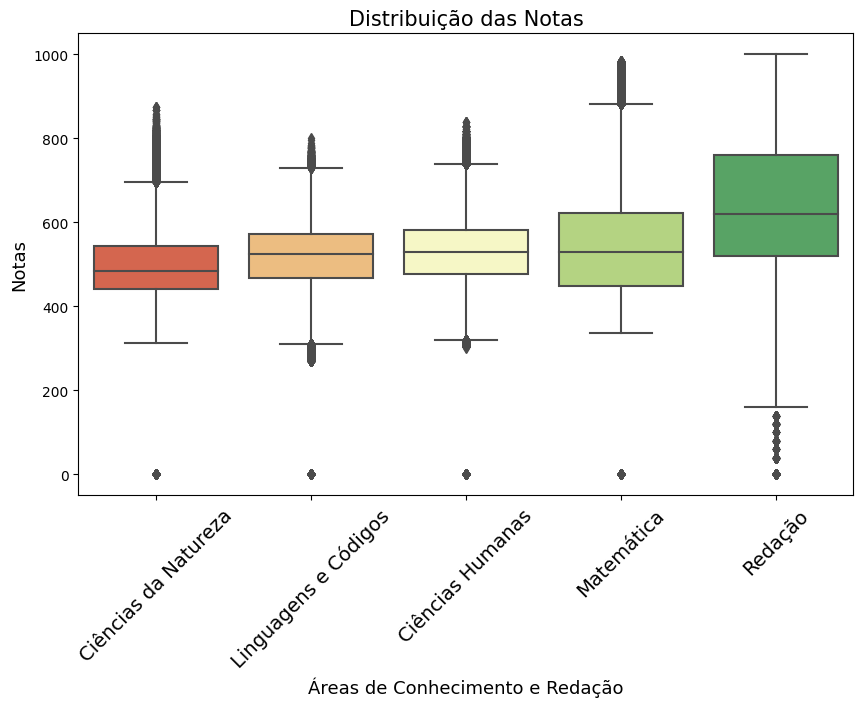

In [ ]:
# Selecionar as colunas de notas das disciplinas e redação
notas_disciplinas = ['NU_NOTA_CN', 'NU_NOTA_LC', 'NU_NOTA_CH', 'NU_NOTA_MT']
nota_redacao = 'NU_NOTA_REDACAO'

# Criar um DataFrame com as notas
notas_df = dataframe[notas_disciplinas + [nota_redacao]]

# Rótulos das disciplinas e redação
labels = ['Ciências da Natureza', 'Linguagens e Códigos', 'Ciências Humanas','Matemática', 'Redação']

# Definir paleta de cores
cores = sns.color_palette("RdYlGn", n_colors=len(labels))

# Plotar boxplot das notas com rótulos personalizados e cores destacando a ordenação
plt.figure(figsize=(10, 6))
sns.boxplot(data=notas_df, palette=cores)
plt.xticks(rotation=45,fontsize=14)
plt.title('Distribuição das Notas',fontsize=15)
plt.xlabel('Áreas de Conhecimento e Redação',fontsize=13)
plt.ylabel('Notas',fontsize=13)
plt.xticks(range(len(labels)), labels)  # Definir os rótulos no eixo x
plt.show()


Analisando o gráfico de distribuição das notas nas diferentes áreas de conhecimento do ENEM, podemos tirar algumas conclusões importantes:

**Variabilidade das Notas**: A área de **Matemática** apresenta a maior variabilidade entre as notas, indicada pela maior amplitude interquartil (distância entre o primeiro e o terceiro quartil no boxplot) e a presença de vários outliers (pontos abaixo do limite inferior do boxplot). Isso sugere que as notas de Matemática variam mais amplamente entre os estudantes em comparação com as outras disciplinas. E isso ocorre também com a redação.

**Consistência nas Notas**: **Ciências da Natureza** e **Linguagens e Códigos** apresentam uma consistência maior, com boxplots mais compactos e menos outliers, indicando que as notas tendem a ser mais agrupadas em torno da mediana.

**Distribuição Centralizada**: As notas em **Ciências Humanas** são mais centralizadas em torno da mediana, com um boxplot estreito e simétrico, indicando menos variabilidade e uma distribuição mais uniforme em relação à mediana.

**Desempenho na Redação**: O desempenho em **Redação** é notável, com a mediana mais alta e o quartil superior também elevado em comparação com as outras áreas. No entanto, também possui uma quantidade significativa de outliers baixos, indicando que alguns estudantes tiveram desempenho muito abaixo dos demais.

**Outliers e Desempenho**: A presença de outliers em todas as áreas, especialmente em Matemática e Redação, pode indicar casos extremos de alto e baixo desempenho que poderiam ser investigados para entender melhor os desafios ou as vantagens específicas dos estudantes nessas áreas.

<Figure size 1500x1000 with 0 Axes>

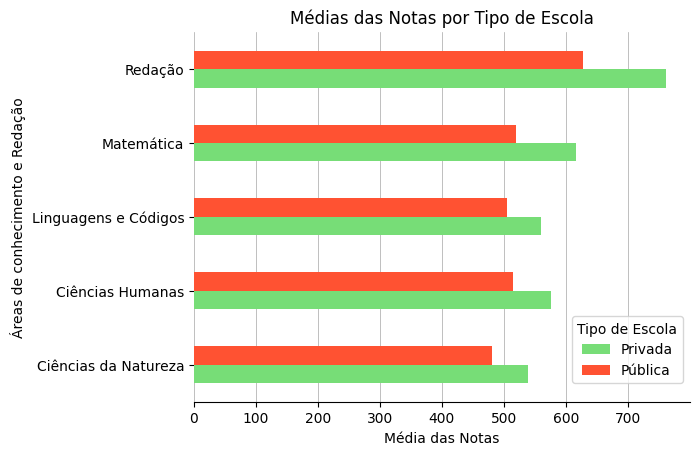

In [ ]:
# Selecionar as colunas de notas das disciplinas e variáveis demográficas
colunas_notas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']
coluna_tipo_escola = 'TP_ESCOLA'  # Coluna que representa o tipo de escola dos alunos

# Filtrar apenas os alunos que têm notas válidas em todas as disciplinas
dados_filtrados = dataframe.dropna(subset=colunas_notas)

# Filtrar apenas escolas públicas e privadas
tipos_escola_filtrados = ['Privada','Pública']
dados_filtrados = dados_filtrados[dados_filtrados[coluna_tipo_escola].isin(tipos_escola_filtrados)]

# Filtrar notas 0 para remover possíveis outliers
for coluna in colunas_notas:
    dados_filtrados = dados_filtrados[dados_filtrados[coluna] != 0]


# Calcular as médias das notas por tipo de escola e disciplina
media_notas_por_tipo_escola_disciplina = dados_filtrados.groupby([coluna_tipo_escola])[colunas_notas].mean()

# Rótulos das disciplinas e redação
labels = ['Ciências da Natureza', 'Ciências Humanas', 'Linguagens e Códigos', 'Matemática', 'Redação']

# Aumentar o tamanho do gráfico
plt.figure(figsize=(15, 10))

# Plotar o gráfico de barras horizontais
ax = media_notas_por_tipo_escola_disciplina.T.plot(kind='barh', color=['#77dd77', '#ff5232'])

# Remover bordas do gráfico
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Adicionar grid
ax.set_axisbelow(True)
ax.xaxis.grid(color='gray', linestyle='-', linewidth=0.5, alpha=0.7)

# Adicionar título e rótulos dos eixos
plt.title('Médias das Notas por Tipo de Escola')
plt.xlabel('Média das Notas')
plt.ylabel('Áreas de conhecimento e Redação')
plt.yticks(range(len(labels)), labels)

# Definir a legenda
ax.legend(tipos_escola_filtrados, title='Tipo de Escola', loc='upper right', bbox_to_anchor=(1, 0.25))

# Exibir o gráfico
plt.show()

O gráfico apresenta a comparação entre as médias das notas por tipo de escola (privada e pública) em diferentes áreas de conhecimento do ENEM. Podemos observar algumas tendências interessantes:

**Desempenho Superior das Escolas Privadas**: Em todas as áreas do conhecimento, incluindo Redação, Matemática, Linguagens e Códigos, Ciências Humanas e Ciências da Natureza, as escolas privadas apresentam médias de notas superiores às das escolas públicas. Isso sugere que os estudantes de escolas privadas, em geral, têm um desempenho melhor no ENEM.

**Maior Discrepância em Matemática e na Redação**: A diferença entre as médias das notas de escolas privadas e públicas é particularmente marcante em Matemática e Redação. Isso pode indicar diferenças na qualidade ou quantidade de ensino e recursos disponíveis para estudantes em escolas privadas versus públicas nesta disciplina.

**Implicações para Políticas Educacionais**: Os dados sugerem que pode haver uma necessidade de revisão e potencial reforço de recursos e métodos de ensino nas escolas públicas para reduzir a disparidade educacional. Investimentos em melhorias em áreas críticas, como Matemática, poderiam ajudar a elevar o desempenho dos estudantes em escolas públicas.

**Planejamento de Intervenções**: Para educadores e formuladores de políticas, entender essas disparidades pode ajudar no planejamento de intervenções específicas que visem melhorar a qualidade do ensino nas escolas públicas, especialmente em áreas onde as discrepâncias são mais pronunciadas.

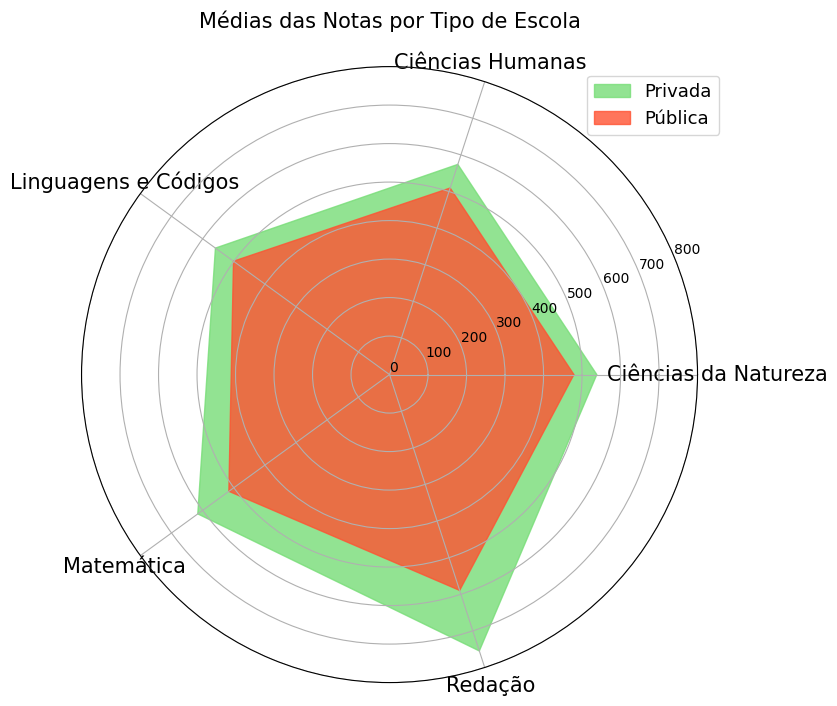

In [ ]:
# Selecionar as colunas de notas das disciplinas e variáveis demográficas
colunas_notas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']

# Filtrar apenas os alunos que têm notas válidas em todas as disciplinas
dados_filtrados = dataframe.dropna(subset=colunas_notas)

# Calcular as médias das notas por tipo de escola
media_notas_por_escola = dados_filtrados.groupby('TP_ESCOLA')[colunas_notas].mean()

# Rótulos das disciplinas e redação
labels = ['Ciências da Natureza', 'Ciências Humanas', 'Linguagens e Códigos', 'Matemática', 'Redação']

# Rótulo das notas
scores = [0, 100, 200, 300, 400, 500, 600, 700,800]

# Definir a paleta de cores personalizada
cores = sns.color_palette(["#77dd77", "#ff5232"])  # Rosa para homens, azul para mulheres

# Plotar o gráfico de raio solar
plt.figure(figsize=(12, 8))
ax = plt.subplot(111, polar=True)

# Ângulos para cada nota
angulos = np.linspace(0, 2*np.pi, len(colunas_notas), endpoint=False)
angulos = np.concatenate((angulos, [angulos[0]]))  # Fechar o gráfico

# Valores das médias para cada sexo
media_privada = media_notas_por_escola.loc['Privada'].values
media_publica = media_notas_por_escola.loc['Pública'].values
media_privada = np.concatenate((media_privada, [media_privada[0]]))  # Fechar o gráfico
media_publica = np.concatenate((media_publica, [media_publica[0]]))  # Fechar o gráfico

# Plotar as áreas para cada sexo com cores personalizadas
ax.fill(angulos, media_privada, alpha=0.8, color=cores[0], label='Privada')
ax.fill(angulos, media_publica, alpha=0.8, color=cores[1], label='Pública')

# Adicionar rótulos para cada nota
plt.xticks(angulos[:-1], labels)#"'fontweight='bold'")
plt.tick_params(axis='x', labelsize=15)

# Adicionar linhas radiais e marcas (scores)
ax.set_rticks(scores)  # Adicionar as marcas de scores nos eixos radiais

# Adicionar legenda com tamanho de fonte maior
ax.legend(loc='upper right', prop={'size': 13}, bbox_to_anchor=(1.05, 1.0))

# Adicionar título
plt.title('Médias das Notas por Tipo de Escola',fontsize=15,y=1.05)

# Exibir o gráfico
plt.show()


Este é um gráfico em radar que também compara as médias das notas por tipo de escola (privada e pública) nas diferentes áreas de conhecimento do ENEM.

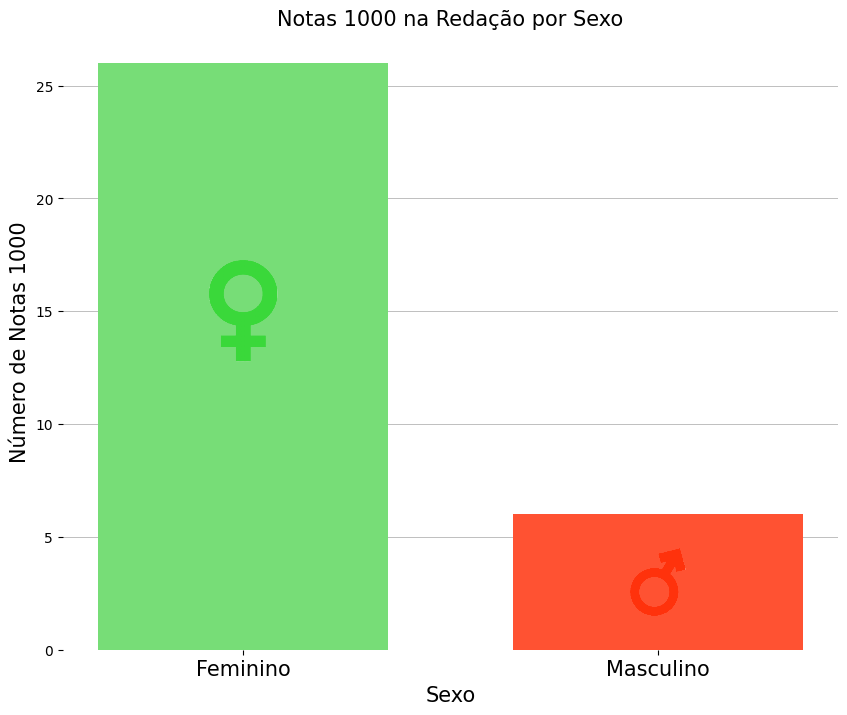

In [ ]:
# Filtrar apenas as linhas com notas 1000
filtered_dataframe = dataframe[dataframe['NU_NOTA_REDACAO'] == 1000].copy()

# Mapear os valores de sexo para números (feminino = 0, masculino = 1)
filtered_dataframe['TP_SEXO'] = filtered_dataframe['TP_SEXO'].map({'F': 0, 'M': 1})

# Criar um DataFrame com a contagem de notas 1000 por sexo
count_by_sex = filtered_dataframe['TP_SEXO'].value_counts()

# Definir cores para as barras
colors = ['#77dd77','#ff5232']

# Caminhos das imagens dos ícones
icon_paths = [ '/content/drive/MyDrive/symbol-female.png','/content/drive/MyDrive/male-symbol.png']

# Posições verticais para os ícones
icon_positions = [15, 3]

# Fatores de zoom para as imagens
icon_zoom_factors = [0.3, 0.2]

# Criar o gráfico de barras com tamanho maior
fig, ax = plt.subplots(figsize=(10, 8))  # Aumentar o tamanho do gráfico
bar_width = 0.7  # Largura das barras
scaled_values = count_by_sex.values * 1  # Fator de escala para a altura das barras
bars = ax.bar(count_by_sex.index, scaled_values, width=bar_width, color=colors)
ax.set_xlabel('Sexo',fontsize=15)
ax.set_ylabel('Número de Notas 1000',fontsize=15)
ax.set_title('Notas 1000 na Redação por Sexo',fontsize=15)
ax.set_xticks(count_by_sex.index)
ax.set_xticklabels(['Feminino', 'Masculino'],fontsize=15)

# Remover bordas do gráfico
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Adicionar grid cinza claro no fundo com linhas contínuas
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='-', linewidth=0.5, alpha=0.7)
#ax.xaxis.grid(color='gray', linestyle='-', linewidth=0.5, alpha=0.7)

# Adicionar ícones nas posições especificadas com zoom controlado
for bar, y_pos, icon_path, zoom_factor in zip(bars, icon_positions, icon_paths, icon_zoom_factors):
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    icon = plt.imread(icon_path)
    imagebox = OffsetImage(icon, zoom=zoom_factor)
    ab = AnnotationBbox(imagebox, (x, y_pos), frameon=False, pad=0.0, xycoords='data', boxcoords="data")
    ax.add_artist(ab)


plt.show()

Este gráfico mostra a distribuição de notas máximas (1000) na redação do ENEM, separadas por sexo. As observações principais incluem:

**Desempenho Superior Feminino**: Há um número significativamente maior de candidatas do sexo feminino que alcançaram a nota máxima na redação comparado aos candidatos do sexo masculino. Isso sugere que as candidatas femininas, em geral, se saíram melhor na redação.

**Implicações sobre Habilidades de Escrita**: A disparidade nas notas pode refletir diferenças nas habilidades de escrita entre os sexos. Estudos anteriores sugerem que meninas frequentemente desenvolvem habilidades de leitura e escrita mais cedo do que meninos, o que pode influenciar os resultados em avaliações de redação.

**Considerações Educacionais**: Este resultado pode motivar uma análise mais aprofundada das estratégias pedagógicas no ensino de habilidades de escrita nas escolas, particularmente para entender e mitigar as diferenças de desempenho entre os sexos.

**Planejamento de Recursos e Intervenções**: Educadores e formuladores de políticas podem considerar estes dados ao planejar intervenções educacionais ou ao desenvolver recursos que ajudem a melhorar as habilidades de escrita entre os estudantes masculinos.

**Contexto Social e Cultural**: As diferenças também podem estar influenciadas por fatores sociais e culturais que afetam a maneira como meninos e meninas são educados em relação às habilidades de comunicação e expressão.

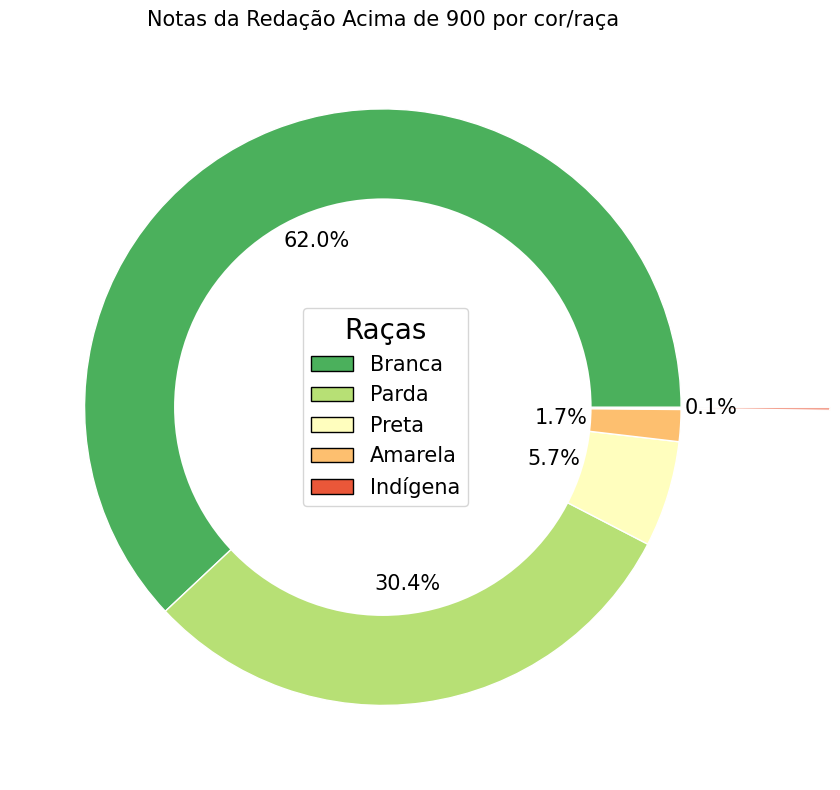

In [ ]:
# Filtrar apenas os alunos com notas acima de 900
notas_acima_de_900 = dataframe[dataframe['NU_NOTA_REDACAO'] > 900]

# Filtrar a categoria 'Não declarado'
notas_acima_de_900 = notas_acima_de_900[notas_acima_de_900['TP_COR_RACA'] != 'Não declarado']

# Calcular a distribuição de raça nas duas categorias
distribuicao_raca_acima_de_900 = notas_acima_de_900['TP_COR_RACA'].value_counts(normalize=True)

# Definir cores usando a paleta de cores "RdYlGn_r"
cores = sns.color_palette("RdYlGn_r", n_colors=len(distribuicao_raca_acima_de_900))

# Identificar a menor fatia
menor_fatia = distribuicao_raca_acima_de_900.idxmin()

# Criar a lista de afastamentos (explode)
explode = [0.5 if cor == menor_fatia else 0 for cor in distribuicao_raca_acima_de_900.index]

# Criar a figura e os eixos
fig, ax1 = plt.subplots(figsize=(15, 8))

# Gráfico para notas acima de 900
wedges, texts, autotexts = ax1.pie(distribuicao_raca_acima_de_900, labels=None, autopct='%1.1f%%', colors=cores, wedgeprops={'edgecolor': 'white'}, explode=explode,
                                   radius=1,textprops={'fontsize': 15})
ax1.set_title('Notas da Redação Acima de 900 por cor/raça',fontsize=15)

# Adicionar círculo branco no meio para criar o espaço
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)

# Criar a legenda separada com bolinhas coloridas e nomes de raças
legend_elements = [Patch(facecolor=cor, edgecolor='black', label=nome) for cor, nome in zip(cores, distribuicao_raca_acima_de_900.index)]
ax1.legend(handles=legend_elements, title='Raças',title_fontsize=20,loc='center left', bbox_to_anchor=(0.379, 0.5),prop={'size': 15})

plt.tight_layout()
plt.show()

Este gráfico de donut exibe a distribuição percentual das notas de redação acima de 900 no ENEM, categorizadas por cor/raça. As principais observações incluem:

**Predomínio de Candidatos Brancos**: Uma grande maioria, 62.0%, das notas acima de 900 foram obtidas por candidatos que se identificam como brancos. Isso sugere uma discrepância significativa no desempenho em redação quando comparado com outras categorias raciais.

**Desempenho de Outras Raças**: Candidatos que se identificam como pardos representam 30.4%, seguidos por amarelos (5.7%), pretos (1.7%) e indígenas (0.1%). A representação desses grupos em notas altas é notavelmente menor, especialmente para candidatos pretos e indígenas.

**Reflexões sobre Igualdade de Oportunidades**: A distribuição pode refletir desigualdades subjacentes no sistema educacional que afetam de maneira desproporcional estudantes de diferentes grupos raciais. Isso pode incluir acesso a recursos educacionais de qualidade, preparação para o exame e outros fatores socioeconômicos.

**Implicações para Políticas Públicas**: Os dados destacam a necessidade de políticas educacionais que promovam igualdade de oportunidades para todos os estudantes, independentemente de sua cor ou raça. Isso poderia incluir programas de apoio acadêmico, intervenções direcionadas e revisões curriculares para garantir que todos os estudantes tenham a mesma capacidade de alcançar notas altas.

**Necessidade de Mais Pesquisa e Análise**: Seria útil investigar mais a fundo as causas dessas disparidades, incluindo estudos qualitativos que possam explorar as experiências e desafios enfrentados por estudantes de diferentes grupos raciais.

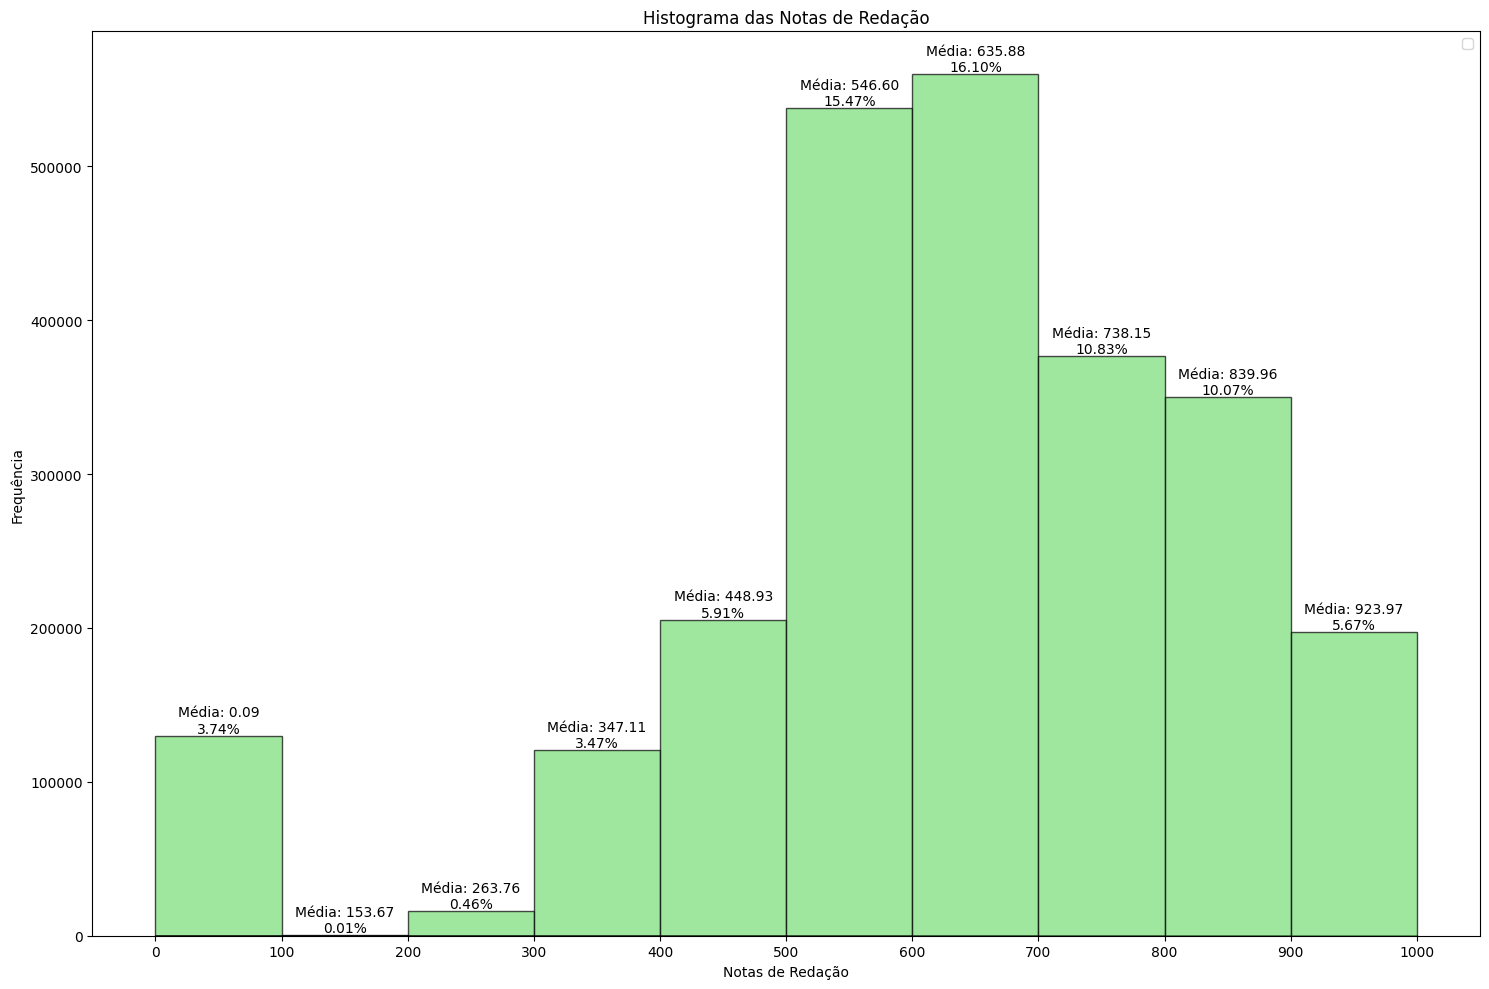

In [ ]:
# Filtrar as notas de redação
notas_redacao = dataframe['NU_NOTA_REDACAO']

# Definir os intervalos para o histograma (de 0 a 1000 em intervalos de 100)
intervalos = range(0, 1100, 100)

# Plotar o histograma das notas de redação com os intervalos definidos
plt.figure(figsize=(15, 10))
for i, intervalo in enumerate(intervalos[:-1]):
    notas_intervalo = notas_redacao[(notas_redacao >= intervalo) & (notas_redacao < intervalos[i+1])]
    mean_intervalo = notas_intervalo.mean()
    percentage = len(notas_intervalo) / len(notas_redacao) * 100

    #plt.hist(notas_intervalo, bins=intervalos, color="green", alpha=0.7, edgecolor='black', label=f'Intervalo {intervalo}-{intervalos[i+1]}')

    # Calcular posição da barra atual
    x_pos = intervalo + 50
    y_pos = plt.hist(notas_intervalo, bins=intervalos, color="#77dd77", alpha=0.7, edgecolor='black')[0][i] + 15

    plt.text(x_pos, y_pos,
             f'Média: {mean_intervalo:.2f}\n{percentage:.2f}%',
             horizontalalignment='center', verticalalignment='bottom', color='black', fontsize=10)

plt.title('Histograma das Notas de Redação')
plt.xlabel('Notas de Redação')
plt.ylabel('Frequência')
plt.xticks(intervalos)
plt.legend()

plt.tight_layout()  # Ajustar layout para evitar sobreposição
plt.show()

Este histograma mostra a distribuição das notas de redação no ENEM, com as médias e as porcentagens de estudantes em cada intervalo de notas. Aqui estão algumas observações e conclusões baseadas no gráfico:

**Concentração de Notas Médias e Altas**: A maior concentração de notas ocorre nos intervalos de média de 546,60 até 738,15, que representam uma grande porção dos candidatos, com as maiores frequências. Isso indica que a maioria dos estudantes alcança notas consideradas medianas a altas na redação.

**Notas Muito Baixas e Muito Altas**: As frequências de notas extremamente baixas (média de 0,09 até 263,76) e extremamente altas (médias acima de 800) são significativamente menores. Isso é típico em avaliações padronizadas, onde a maioria dos candidatos tende a se agrupar em torno de uma média, com menos candidatos alcançando resultados muito pobres ou excepcionais.

**Distribuição das Notas Altas**: Notavelmente, ainda há um bom número de estudantes alcançando notas entre 738,15 e 923,97, o que reflete uma capacidade significativa entre os estudantes de produzir redações de alta qualidade sob as condições do exame.

**Desempenho na Extremidade Superior**: A barra para a faixa de notas mais alta (média de 923,97) mostra que um pequeno, mas notável grupo de estudantes consegue excelência na redação, o que pode ser indicativo de habilidades excepcionais de escrita ou preparação intensiva.

**Implicações Educacionais**: As informações podem ser úteis para educadores e formuladores de políticas para entender as capacidades e as deficiências dos estudantes em redação. Especialmente a análise das razões para as notas muito baixas pode ajudar a identificar necessidades de intervenções educativas específicas para melhorar a escrita dos estudantes.

**Planejamento de Recursos**: Esses dados também podem informar sobre onde alocar recursos para programas de tutoria ou cursos de redação, especialmente focados em ajudar estudantes que estão na faixa inferior de desempenho.


In [ ]:
# Carregar o arquivo CSV de municípios
municipios = pd.read_csv('/content/drive/MyDrive/municipios.csv', sep=',')

# Mesclar os dataframes
df_merged = pd.merge(dataframe, municipios,
                     how='left',left_on=['CO_MUNICIPIO_ESC'],
                     right_on=['codigo_ibge'])


### Gráfico de dispersão que exibe a distribuição das faixas socioeconômicas

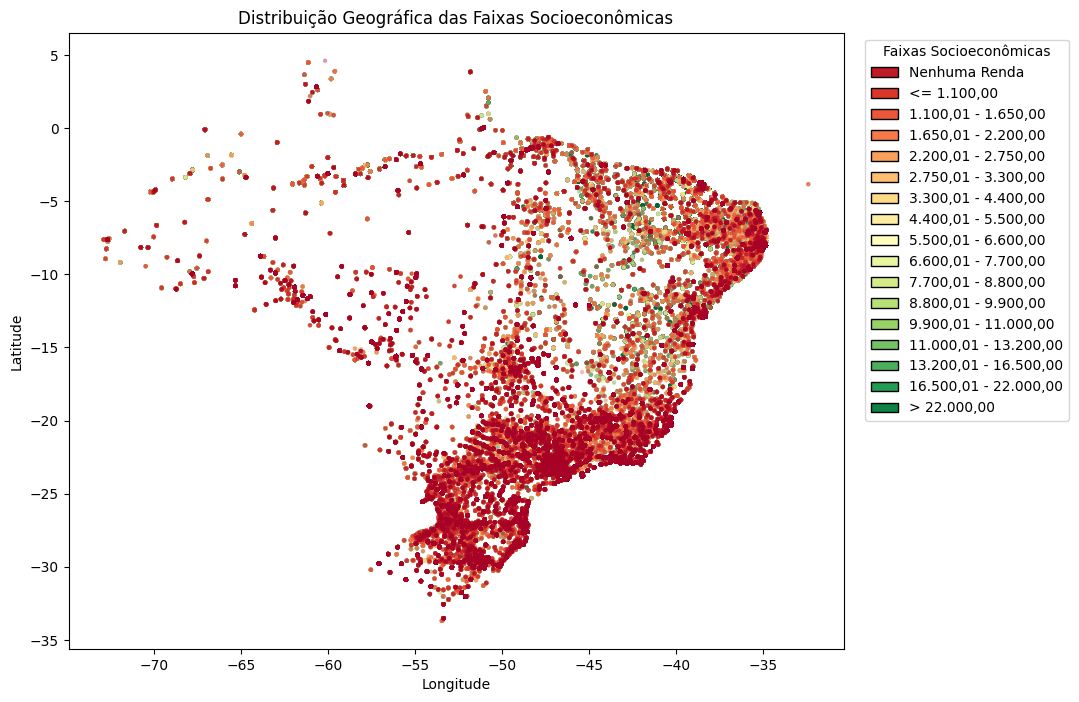

In [ ]:
# Definir a ordem das faixas socioeconômicas
ordem_faixas = ['Nenhuma Renda', '<= 1.100,00', '1.100,01 - 1.650,00', '1.650,01 - 2.200,00',
                '2.200,01 - 2.750,00', '2.750,01 - 3.300,00', '3.300,01 - 4.400,00',
                '4.400,01 - 5.500,00', '5.500,01 - 6.600,00', '6.600,01 - 7.700,00',
                '7.700,01 - 8.800,00', '8.800,01 - 9.900,00', '9.900,01 - 11.000,00',
                '11.000,01 - 13.200,00', '13.200,01 - 16.500,00', '16.500,01 - 22.000,00',
                '> 22.000,00']

# Definir as faixas socioeconômicas como categoria categórica com a ordem desejada
df_merged['Q006'] = pd.Categorical(df_merged['Q006'], categories=ordem_faixas, ordered=True) # Q006 "Qual é a renda mensal de sua família? (Some a sua renda com a dos seus familiares.)"

# Ordenar os dados pelo valor da categoria categórica
df_merged = df_merged.sort_values(by='Q006')

# Definir as variáveis
latitude = df_merged['latitude']
longitude = df_merged['longitude']

# Calcular a contagem das faixas socioeconômicas
faixas_counts = df_merged['Q006'].value_counts()

# Criar uma paleta de cores para as faixas socioeconômicas usando a paleta RdYlGn
cores = sns.color_palette("RdYlGn", n_colors=len(faixas_counts))

# Criar um scatter plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(longitude, latitude,
                      c=faixas_counts[df_merged['Q006']].values, cmap='RdYlGn', s=5, alpha=0.3)

# Criar os elementos da legenda manualmente
legend_elements = [Patch(facecolor=cor, edgecolor='black', label=faixa) for cor, faixa in zip(cores, ordem_faixas)]
plt.legend(handles=legend_elements, title='Faixas Socioeconômicas',loc="upper right",bbox_to_anchor=(1.3, 1))

plt.title('Distribuição Geográfica das Faixas Socioeconômicas')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()

O gráfico exibe a distribuição geográfica das faixas socioeconômicas no Brasil, com base em dados de renda. Observa-se uma variação considerável nas cores que representam diferentes níveis de renda. Algumas interpretações e observações podem ser feitas:

**Concentração de Faixas de Renda**: As áreas densamente coloridas em tons de vermelho, indicando nenhuma renda ou renda muito baixa, parecem predominar em grande parte do território, especialmente nas regiões Norte e Nordeste do Brasil. Isso sugere uma prevalência de candidatos de baixa renda nessas áreas.

**Presença de Renda Média e Alta**: As áreas com faixas de renda média e alta (cores amarela até verde) são menos frequentes e aparecem mais dispersas. Indicando que candidatos de renda média pra alta tendem a ser minoria em comparação com os de baixa renda.

**Implicações Políticas**: Este padrão de distribuição de renda tem implicações profundas para políticas públicas, incluindo a necessidade de focar recursos e programas de desenvolvimento econômico nas áreas mais carentes para reduzir a disparidade regional.

**Planejamento Urbano e Desenvolvimento**: O mapeamento da renda por região pode auxiliar no planejamento urbano e no desenvolvimento de infraestrutura, garantindo que investimentos sejam direcionados para as áreas mais necessitadas.

**Análise para Intervenções Sociais**: Para organizações não governamentais e agências governamentais, esses dados são cruciais para direcionar esforços de assistência social, programas educacionais e de saúde para melhorar a qualidade de vida nas regiões mais afetadas pela pobreza.

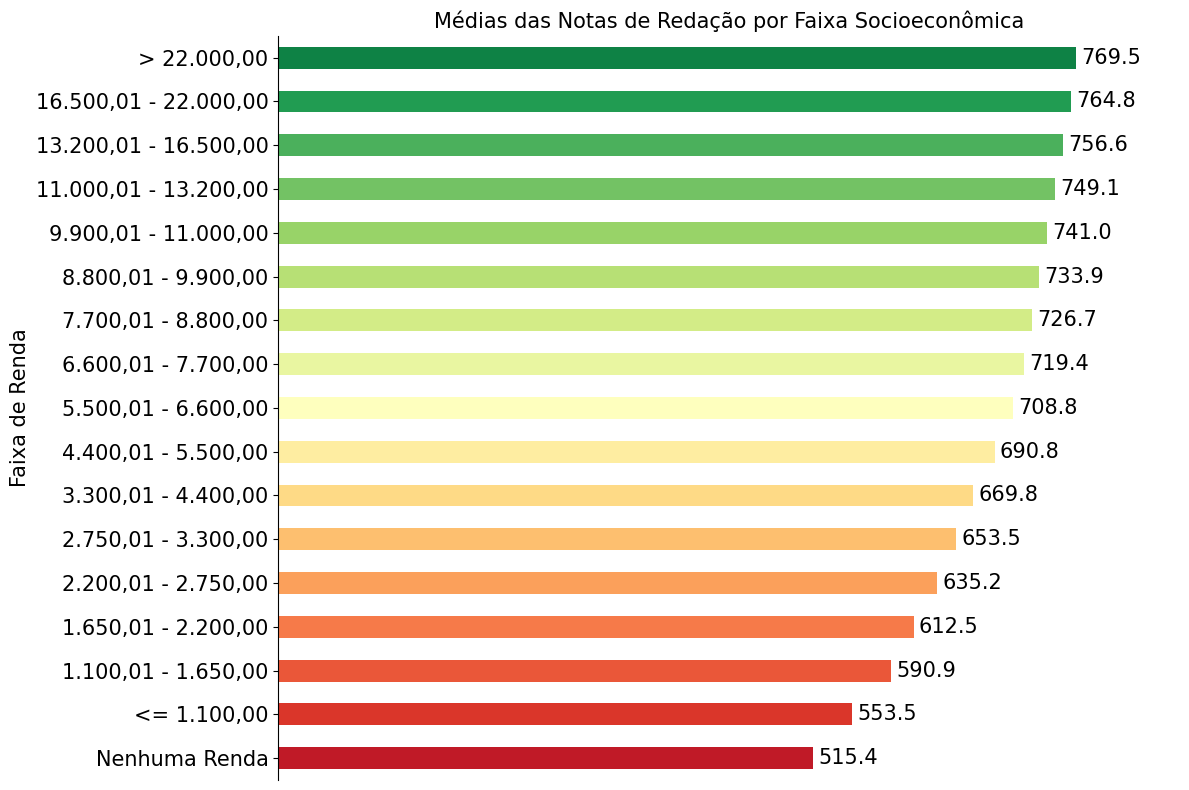

In [ ]:
dados_filtrados = dataframe.dropna(subset='Q006')

# Calcular a média das notas de Redação por faixa de renda
media_redacao_por_faixa_renda = dados_filtrados.groupby('Q006')['NU_NOTA_REDACAO'].mean()

# Ordenar o DataFrame pela ordem das faixas de renda
media_redacao_por_faixa_renda = media_redacao_por_faixa_renda.reindex(index=q006_labels.values())

# Definir cores personalizadas para cada faixa de renda
cores = sns.color_palette("RdYlGn", n_colors=len(media_redacao_por_faixa_renda))

# Criar um gráfico de barras horizontais
plt.figure(figsize=(12, 8))
ax = media_redacao_por_faixa_renda.plot(kind='barh', color=cores, fontsize=15)

# Adicionar as médias nas barras
for i, v in enumerate(media_redacao_por_faixa_renda):
    ax.text(v + 5, i, f'{v:.1f}', va='center', fontsize=15)

plt.title('Médias das Notas de Redação por Faixa Socioeconômica', fontsize=15)
plt.xlabel('Média da Nota de Redação',fontsize=15)
plt.ylabel('Faixa de Renda', fontsize=15)

# Remover o eixo x
ax.xaxis.set_visible(False)

# Remover as bordas, exceto a borda do eixo y
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Ajustar os limites do eixo x para mover a borda preta para a direita
ax.set_xlim([0, max(media_redacao_por_faixa_renda) + 100])

plt.tight_layout()
plt.show()


Este gráfico de barras mostra as médias das notas de redação no ENEM categorizadas por faixa socioeconômica. As barras são codificadas por cor, representando diferentes níveis de renda, desde "Nenhuma Renda" até rendas superiores a "22.000,00". A análise visual deste gráfico sugere várias observações importantes:

**Correlação entre Renda e Desempenho**: Existe uma clara tendência ascendente nas médias das notas de redação à medida que aumenta a faixa de renda. Candidatos das faixas de renda mais altas tendem a ter médias de notas significativamente maiores do que aqueles nas faixas mais baixas.

**Impacto da Renda na Educação**: Este padrão sugere que o acesso a recursos, que muitas vezes está correlacionado com a renda familiar, pode ter um impacto substancial no desempenho educacional. Isso pode incluir acesso a materiais de estudo de melhor qualidade, ambientes de estudo mais propícios, e até acesso a preparação especializada para exames.

**Disparidades Socioeconômicas**: As notas mais baixas nas faixas de "Nenhuma Renda" e rendas até "1.650,00" destacam disparidades socioeconômicas significativas. Este é um indicativo de que estudantes de fundo mais pobre podem estar enfrentando desvantagens consideráveis que afetam seu desempenho acadêmico.

**Desafios para a Política Educacional**: Os resultados podem ser utilizados para argumentar a favor de políticas educacionais que se concentrem em equilibrar o campo de jogo, tal como bolsas de estudos, programas de tutoria, e investimentos em escolas em áreas de baixa renda para ajudar a elevar o desempenho dos estudantes dessas faixas.

**Necessidade de Suporte Adicional**: A correlação entre renda e notas pode também indicar a necessidade de suporte adicional para estudantes de famílias de baixa renda, não apenas em termos de preparação para exames, mas também no suporte básico para o sucesso acadêmico, incluindo alimentação, saúde e moradia.

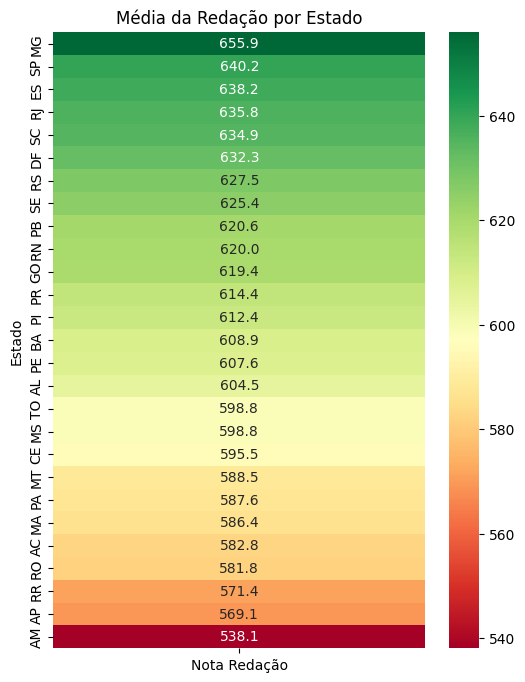

In [ ]:
# Calculando a média das notas da redação por estado
media_notas_redacao = dataframe.groupby('SG_UF_PROVA')['NU_NOTA_REDACAO'].mean().reset_index()

# Ordenar as médias das notas em ordem decrescente
media_notas_redacao = media_notas_redacao.sort_values(by='NU_NOTA_REDACAO', ascending=False)

# Criando uma categoria categórica ordenada para a coluna 'SG_UF_PROVA'
media_notas_redacao['SG_UF_PROVA'] = pd.Categorical(media_notas_redacao['SG_UF_PROVA'],
                                                    categories=media_notas_redacao['SG_UF_PROVA'],
                                                    ordered=True)

# Renomear a coluna 'NU_NOTA_REDACAO' para 'Nota Redação'
media_notas_redacao = media_notas_redacao.rename(columns={'NU_NOTA_REDACAO': 'Nota Redação'})

# Criando o mapa de calor
plt.figure(figsize=(6, 8))
sns.heatmap(data=media_notas_redacao.pivot_table(index='SG_UF_PROVA', values='Nota Redação'),
            cmap='RdYlGn', annot=True, fmt=".1f",
            yticklabels=media_notas_redacao['SG_UF_PROVA'])
plt.title('Média da Redação por Estado')
#plt.xlabel('Estado')
plt.ylabel('Estado')
plt.show()

O gráfico de barras apresenta as médias das notas de redação do ENEM por estado, coloridas de verde para os estados com as maiores médias até vermelho para os estados com as menores médias. Aqui estão algumas interpretações e observações baseadas nesse gráfico:

**Variação Regional nas Médias**: Há uma variação clara nas médias das notas de redação entre os estados. Estados como Minas Gerais (MG) e São Paulo (SP) estão no topo com as maiores médias, enquanto estados como Amapá (AP) e Roraima (RR) têm as menores médias.

**Desempenho por Região**: Estados do Sudeste e do Sul, como MG, SP, Rio de Janeiro (RJ), e Santa Catarina (SC), estão entre os que têm as maiores médias. Isso pode refletir um acesso mais amplo a recursos educacionais, melhores infraestruturas escolares e maior investimento em educação nessas regiões.

**Desafios no Norte e Nordeste**: Os estados com as menores médias, incluindo vários do Norte (como AP, RR e AM) do Nordeste (como CE e AL), indicam possíveis desafios educacionais nessas regiões, como falta de recursos, infraestrutura inadequada e menor investimento per capita em educação.

**Implicações para Políticas Públicas**: A variação nas médias das notas de redação por estado pode ser um indicativo importante para a formulação de políticas públicas focadas em reduzir disparidades educacionais. Programas específicos para melhorar a qualidade da educação nos estados com desempenho mais baixo podem ser necessários.

**Investimento em Capacitação**: Para elevar as médias de redação nos estados com desempenho inferior, pode ser crucial investir na capacitação de professores, na melhoria da infraestrutura das escolas, e no fornecimento de materiais didáticos e tecnológicos atualizados.

**Acesso a Preparatórios**: O acesso a cursos preparatórios para o ENEM e outros recursos de aprendizado também pode influenciar as médias de redação. Estados com maior acesso a esses recursos podem ter estudantes mais bem preparados para o exame.

### Avaliando a importância de determinados fatores nas notas de Redações acima de 700

In [ ]:
# Definir as variáveis independentes (X) e a variável de interesse (y)
X = dataframe[['TP_ESCOLA', 'SG_UF_PROVA', 'TP_SEXO', 'TP_COR_RACA', 'Q001', 'Q002','Q006']]
y = dataframe['NU_NOTA_REDACAO']

# Criar um DataFrame combinado para remover as linhas com valores NaN mantendo o índice
combined_df = pd.concat([X, y], axis=1)
combined_df = combined_df.dropna()

# Removendo possíveis outliers
combined_df = combined_df[combined_df['NU_NOTA_REDACAO'] >= 200] # remove valores abaixo de 200

# Transformando em binário
combined_df['NU_NOTA_REDACAO'] = np.where(combined_df['NU_NOTA_REDACAO'] > 700, 1, 0) # se a nota for maior que 700 recebe 1, senão recebe 0

# Separar novamente X e y após remover os NaNs
X = combined_df.drop(columns=['NU_NOTA_REDACAO'])
y = combined_df['NU_NOTA_REDACAO']

<ipython-input-14-a01bb3e3b29f>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df['NU_NOTA_REDACAO'] = np.where(combined_df['NU_NOTA_REDACAO'] > 700, 1, 0) # se a nota for maior que 700 recebe 1, senão recebe 0


In [ ]:
# Criar cópia do DataFrame 'X' para realizar as transformações
X_encoded = X.copy()

# Usar LabelEncoder para transformar as variáveis categóricas em valores numéricos
label_encoders = {}  # Dicionário para guardar os LabelEncoders para cada coluna
for col in X_encoded.columns:
    label_encoders[col] = LabelEncoder()
    X_encoded[col] = label_encoders[col].fit_transform(X_encoded[col])

# Usar OneHotEncoder para criar variáveis dummy para as categorias
onehot_encoder = OneHotEncoder(drop='first', sparse=False)
X_encoded = onehot_encoder.fit_transform(X_encoded)

# Obter os nomes das colunas originais
original_columns = X.columns

# Obter as categorias originais para cada coluna
original_categories = [label_encoders[col].classes_ for col in original_columns]

# Criar os nomes das colunas transformadas
encoded_columns = []
for col, categories in zip(original_columns, original_categories):
    encoded_columns.extend([f'{col}_{category}' for category in categories[1:]])  # Pular a primeira categoria

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


O Random Forest é um algoritmo baseado em árvores de decisão. Durante o treinamento, cada árvore de decisão no conjunto é treinada em uma amostra aleatória dos dados e faz previsões independentes. A importância das variáveis é avaliada observando como a precisão das previsões diminui quando uma determinada variável é aleatoriamente embaralhada nos dados de teste (método de Permutação). Quanto maior a queda na precisão, mais importante é a variável.

In [ ]:
# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Treinar uma árvore individual
tree_model = RandomForestRegressor(n_estimators=100, random_state=42)
tree_model.fit(X_train, y_train)

# Armazenar as importâncias da árvore atual
tree_importances = tree_model.feature_importances_

# Verificar a acurácia
predictions = tree_model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
rmse

0.45553515707827213

In [ ]:
# Criar os nomes das colunas originais
original_columns = X.columns

# Criar um dicionário para armazenar as importâncias
importance_dict = {category: 0 for category in set(encoded_columns)}

for col, importance in zip(encoded_columns,tree_importances):
    importance_dict[col] += importance

In [ ]:
# Criar um dicionário para mapear as categorias amplas para as categorias específicas
category_mapping = {}
for category in original_columns:
    specific_categories = [col for col in encoded_columns if col.startswith(category)]
    category_mapping[category] = specific_categories

In [ ]:
# Criar um dicionário para armazenar as somas das importâncias por categoria ampla
broad_category_importance = {broad: 0 for broad in category_mapping}

# Loop pelas importâncias das colunas transformadas e atribua às categorias amplas correspondentes
for col, importance in zip(encoded_columns, tree_importances):
    for broad, specific_categories in category_mapping.items():
        if col in specific_categories:
            broad_category_importance[broad] += importance

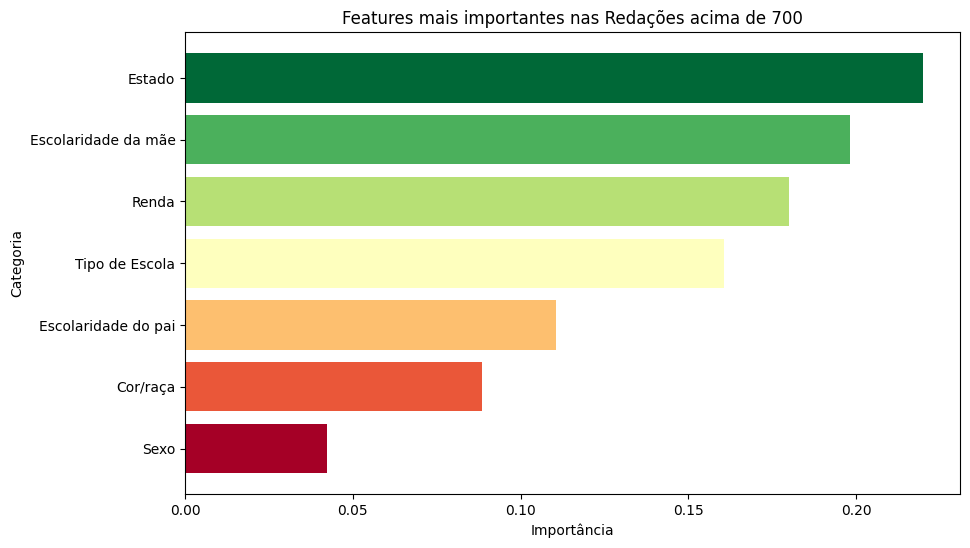

In [ ]:
# Preparar dados para o gráfico
categories = list(broad_category_importance.keys())
importances = list(broad_category_importance.values())

# Mapear nomes de categoria para os rótulos desejados
category_labels = {
    'TP_ESCOLA': 'Tipo de Escola',
    'SG_UF_PROVA': 'Estado',
    'TP_SEXO': 'Sexo',
    'TP_COR_RACA': 'Cor/raça',
    'Q001': 'Escolaridade do pai',
    'Q002': 'Escolaridade da mãe',
    'Q006': 'Renda'
}

# Substituir os nomes de categoria pelos rótulos personalizados
categories_with_labels = [category_labels.get(cat, cat) for cat in categories]

# Ordenar as categorias e importâncias juntas
sorted_categories_with_labels = [x for _, x in sorted(zip(importances, categories_with_labels), reverse=False)]
sorted_importances = sorted(importances, reverse=False)

# Criar o gráfico de barras usando a paleta de cores RdYlGn
plt.figure(figsize=(10, 6))
plt.barh(sorted_categories_with_labels, sorted_importances, color=plt.cm.RdYlGn(np.linspace(0, 1, len(importances))))
plt.xlabel('Importância')
plt.ylabel('Categoria')
plt.title('Features mais importantes nas Redações acima de 700')
plt.show()

O gráfico de barras mostra a importância de diversas características (features) para a obtenção de notas acima de 700 na redação do ENEM. Vamos analisar cada característica destacada:

**Estado**: A localização geográfica do estudante é a característica mais importante, sugerindo que fatores regionais como qualidade da educação, investimento em escolas, e acesso a recursos educacionais podem desempenhar um papel significativo nas notas de redação.

**Escolaridade da Mãe**: A segunda característica mais influente é a escolaridade da mãe, que frequentemente é um indicador de ambiente educacional em casa e acesso a recursos que podem facilitar a educação dos filhos.

**Renda**: Segue-se a renda, que está estreitamente relacionada com acesso a melhores materiais educativos, cursos preparatórios e um ambiente de estudo mais adequado.

**Tipo de Escola**: O tipo de escola (pública ou privada) também é uma característica importante, refletindo diferenças na qualidade de ensino e recursos disponíveis para os estudantes.

**Escolaridade do Pai**: Similar à escolaridade da mãe, a formação educacional do pai é uma proxy para o ambiente educacional e socioeconômico do lar.

**Cor/Raça**: Esta característica tem uma importância moderada, indicando que questões raciais e sociais podem influenciar o desempenho na redação, possivelmente devido a desigualdades educacionais e sociais mais amplas.

**Sexo**: O sexo do estudante tem a menor importância entre as características analisadas, sugerindo que as diferenças de desempenho na redação entre gêneros não são tão pronunciadas quanto outros fatores socioeconômicos ou educacionais.

### Conclusões e Implicações
A análise destas características ressalta a complexidade dos fatores que influenciam o desempenho acadêmico em redação. Isso aponta para a necessidade de políticas educacionais que considerem não apenas as questões pedagógicas mas também as socioeconômicas. Estratégias como melhorar a qualidade das escolas em áreas menos favorecidas, programas de apoio para estudantes de baixa renda, e iniciativas para aumentar a escolaridade dos pais podem ajudar a nivelar as oportunidades educacionais e melhorar as notas de redação no ENEM.

### Avaliando a importância de determinados fatores nas notas de Redações acima de 990

In [ ]:
# Definir as variáveis independentes (X) e a variável de interesse (y)
X = dataframe[['TP_ESCOLA', 'SG_UF_PROVA', 'TP_SEXO', 'TP_COR_RACA', 'Q001', 'Q002','Q006']]
y = dataframe['NU_NOTA_REDACAO']

# Criar um DataFrame combinado para remover as linhas com valores NaN mantendo o índice
combined_df = pd.concat([X, y], axis=1)
combined_df = combined_df.dropna()

# Removendo possíveis outliers
combined_df = combined_df[combined_df['NU_NOTA_REDACAO'] >= 200] # remove valores abaixo de 200

# Transformando em binário
combined_df['NU_NOTA_REDACAO'] = np.where(combined_df['NU_NOTA_REDACAO'] > 990, 1, 0) # se a nota for maior que 700 recebe 1, senão recebe 0

# Separar novamente X e y após remover os NaNs
X = combined_df.drop(columns=['NU_NOTA_REDACAO'])
y = combined_df['NU_NOTA_REDACAO']

<ipython-input-23-6c6862813514>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df['NU_NOTA_REDACAO'] = np.where(combined_df['NU_NOTA_REDACAO'] > 990, 1, 0) # se a nota for maior que 700 recebe 1, senão recebe 0


In [ ]:
# Criar cópia do DataFrame 'X' para realizar as transformações
X_encoded = X.copy()

# Usar LabelEncoder para transformar as variáveis categóricas em valores numéricos
label_encoders = {}  # Dicionário para guardar os LabelEncoders para cada coluna
for col in X_encoded.columns:
    label_encoders[col] = LabelEncoder()
    X_encoded[col] = label_encoders[col].fit_transform(X_encoded[col])

# Usar OneHotEncoder para criar variáveis dummy para as categorias
onehot_encoder = OneHotEncoder(drop='first', sparse=False)
X_encoded = onehot_encoder.fit_transform(X_encoded)

# Obter os nomes das colunas originais
original_columns = X.columns

# Obter as categorias originais para cada coluna
original_categories = [label_encoders[col].classes_ for col in original_columns]

# Criar os nomes das colunas transformadas
encoded_columns = []
for col, categories in zip(original_columns, original_categories):
    encoded_columns.extend([f'{col}_{category}' for category in categories[1:]])  # Pular a primeira categoria

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Treinar uma árvore individual
tree_model = RandomForestRegressor(n_estimators=100, random_state=42)
tree_model.fit(X_train, y_train)

# Armazenar as importâncias da árvore atual
tree_importances = tree_model.feature_importances_

# Verificar a acurácia
predictions = tree_model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
rmse

0.0033480978350818587

In [ ]:
# Criar os nomes das colunas originais
original_columns = X.columns

# Criar um dicionário para armazenar as importâncias
importance_dict = {category: 0 for category in set(encoded_columns)}

for col, importance in zip(encoded_columns,tree_importances):
    importance_dict[col] += importance

In [ ]:
# Criar um dicionário para mapear as categorias amplas para as categorias específicas
category_mapping = {}
for category in original_columns:
    specific_categories = [col for col in encoded_columns if col.startswith(category)]
    category_mapping[category] = specific_categories

In [ ]:
# Criar um dicionário para armazenar as somas das importâncias por categoria ampla
broad_category_importance = {broad: 0 for broad in category_mapping}

# Loop pelas importâncias das colunas transformadas e atribua às categorias amplas correspondentes
for col, importance in zip(encoded_columns, tree_importances):
    for broad, specific_categories in category_mapping.items():
        if col in specific_categories:
            broad_category_importance[broad] += importance

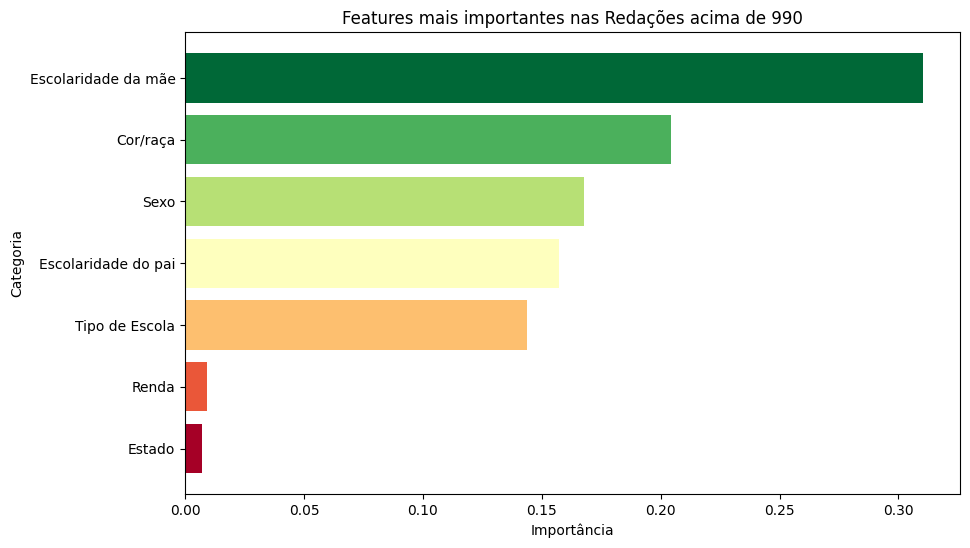

In [ ]:
# Preparar dados para o gráfico
categories = list(broad_category_importance.keys())
importances = list(broad_category_importance.values())

# Mapear nomes de categoria para os rótulos desejados
category_labels = {
    'TP_ESCOLA': 'Tipo de Escola',
    'SG_UF_PROVA': 'Estado',
    'TP_SEXO': 'Sexo',
    'TP_COR_RACA': 'Cor/raça',
    'Q001': 'Escolaridade do pai',
    'Q002': 'Escolaridade da mãe',
    'Q006': 'Renda'
}

# Substituir os nomes de categoria pelos rótulos personalizados
categories_with_labels = [category_labels.get(cat, cat) for cat in categories]

# Ordenar as categorias e importâncias juntas
sorted_categories_with_labels = [x for _, x in sorted(zip(importances, categories_with_labels), reverse=False)]
sorted_importances = sorted(importances, reverse=False)

# Criar o gráfico de barras usando a paleta de cores RdYlGn
plt.figure(figsize=(10, 6))
plt.barh(sorted_categories_with_labels, sorted_importances, color=plt.cm.RdYlGn(np.linspace(0, 1, len(importances))))
plt.xlabel('Importância')
plt.ylabel('Categoria')
plt.title('Features mais importantes nas Redações acima de 990')
plt.show()

Este gráfico de barras mostra a importância de diferentes características para a obtenção de notas excepcionalmente altas (acima de 990) nas redações do ENEM. A distribuição de importâncias é diferente daquela para redações acima de 700, sugerindo que fatores distintos podem ser mais críticos para alcançar o sucesso excepcional. Aqui estão algumas observações baseadas no gráfico:

**Escolaridade da Mãe**: A característica mais influente para alcançar notas acima de 990 é a escolaridade da mãe, o que reforça a ideia de que o ambiente educacional em casa, influenciado pelo nível educacional dos pais, é crucial para o desempenho excepcional em redação.

**Cor/Raça**: Segue-se a cor/raça, que ocupa uma posição significativa, indicando que a identidade racial pode ter implicações profundas no acesso a recursos, oportunidades e, possivelmente, nas expectativas e pressões enfrentadas pelos estudantes.

**Sexo**: O sexo do estudante também aparece como um fator mais relevante para altas pontuações em redação, sugerindo que diferenças de gênero podem influenciar o desempenho em habilidades de escrita ou nas abordagens ao exame.

**Escolaridade do Pai**: Similar à escolaridade da mãe, a educação do pai é importante, embora menos do que a da mãe, possivelmente refletindo dinâmicas familiares e de suporte educacional em casa.

**Tipo de Escola**: O tipo de escola ainda é relevante, mas sua importância é menor para notas acima de 990, o que pode indicar que, para atingir esses níveis excepcionais, outros fatores individuais e familiares se tornam mais determinantes.

**Renda e Estado**: Surpreendentemente, renda e estado têm muito pouca importância para alcançar as notas mais altas. Isso pode sugerir que, para alcançar o sucesso excepcional, fatores como motivação individual, capacidade de escrita e apoio educacional em casa podem superar as vantagens proporcionadas por recursos financeiros ou localização geográfica.

### Implicações e Reflexões
A mudança nas características importantes para alcançar as notas mais altas em redação pode indicar que enquanto certos fatores básicos (como renda e tipo de escola) são importantes para um bom desempenho, outros fatores (como o ambiente educacional em casa e as características individuais) são cruciais para alcançar a excelência. Políticas educacionais e intervenções que visam elevar as notas de redação devem considerar essas nuances para serem eficazes, especialmente ao apoiar estudantes com potencial para desempenho excepcional.